In [1]:
# Dependencies and Setup
import csv
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats



In [2]:
# Study data files
clean_data_path = "data/breast_cancer3.csv"
unclean_data_path = "data/uncleandata.csv"

#Read breast cancer data & study the results
clean_df = pd.read_csv(clean_data_path)
unclean_df = pd.read_csv(unclean_data_path)

#Display the data table for review 
print(clean_df)

      age1  age menopause tumor-size inv-nodes node-caps  deg-malig breast  \
0    40-49   45   premeno      15-19       0-2       yes          3  right   
1    40-50   45      ge40      15-19       0-2        no          1  right   
2    40-51   46      ge40      35-39       0-2        no          2   left   
3    40-52   46   premeno      35-39       0-2       yes          3  right   
4    40-53   47   premeno      30-34       3-5       yes          2   left   
..     ...  ...       ...        ...       ...       ...        ...    ...   
281  50-59   55      ge40      30-34       6-8       yes          2   left   
282  50-59   55   premeno      25-29       3-5       yes          2   left   
283  30-39   35   premeno      30-34       6-8       yes          2  right   
284  50-59   55   premeno      15-19       0-2        no          2  right   
285  50-59   55      ge40      40-44       0-2        no          3   left   

    breast-quad irradiat                 Class  
0       left_u

In [3]:
#Display the data table for review 
print(unclean_df)

      Age   Race Marital Status T Stage  N Stage 6th Stage  \
0      68  White        Married       T1      N1       IIA   
1      50  White        Married       T2      N2      IIIA   
2      58  White       Divorced       T3      N3      IIIC   
3      58  White        Married       T1      N1       IIA   
4      47  White        Married       T2      N1       IIB   
...   ...    ...            ...      ...     ...       ...   
4019   62  Other        Married       T1      N1       IIA   
4020   56  White       Divorced       T2      N2      IIIA   
4021   68  White        Married       T2      N1       IIB   
4022   58  Black       Divorced       T2      N1       IIB   
4023   46  White        Married       T2      N1       IIB   

                  differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0         Poorly differentiated     3  Regional           4        Positive   
1     Moderately differentiated     2  Regional          35        Positive   
2     Moderately d

In [4]:
#Combine data into a single DataFrame

#Select the non-contiguous columns I want to merge from clean_df
clean_columns = clean_df[['menopause', 'Class']]

#Select the column I want to merge from unclean_df
unclean_column = unclean_df[['Survival Months']]

#Concatenate the selected columns horizontally (along columns)
trivariate_df = pd.concat([clean_columns, unclean_column], axis=1)

#Display theh data tabel for preview
print(trivariate_df)

     menopause                 Class  Survival Months
0      premeno     recurrence-events               60
1         ge40  no-recurrence-events               62
2         ge40     recurrence-events               75
3      premeno  no-recurrence-events               84
4      premeno     recurrence-events               50
...        ...                   ...              ...
4019       NaN                   NaN               49
4020       NaN                   NaN               69
4021       NaN                   NaN               69
4022       NaN                   NaN               72
4023       NaN                   NaN              100

[4024 rows x 3 columns]


In [5]:
#Display & check our integer column = Survival Months
trivariate_df.describe(include=[np.number])

,Survival Months
count,4024.000000
mean,71.297962
std,22.921430
min,1.000000
25%,56.000000
50%,73.000000
75%,90.000000
max,107.000000


In [6]:
#Display &check our float columns = menopause &&& Class
trivariate_df.describe(include=[object])


,menopause,Class
count,286,286
unique,3,2
top,premeno,no-recurrence-events
freq,150,201


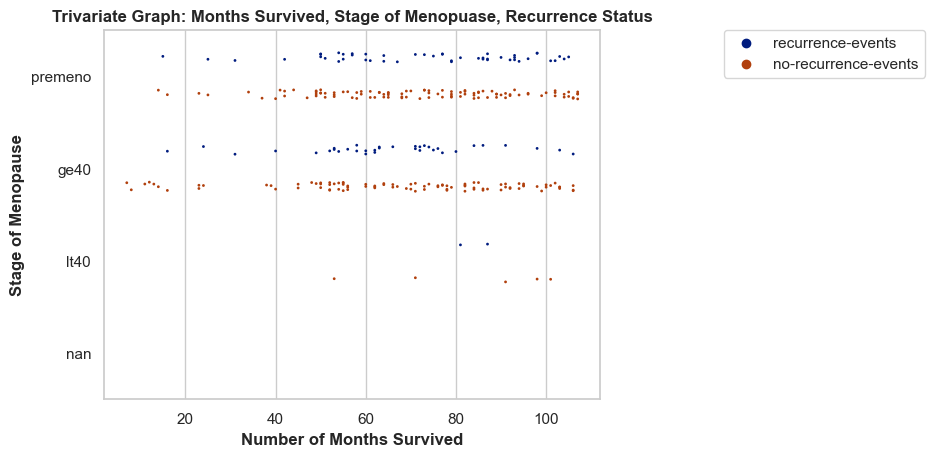

In [7]:
#organize
x = trivariate_df["Survival Months"]
y = trivariate_df["menopause"]
category = trivariate_df["Class"]

# apply the default theme 
sns.set_theme(style="whitegrid", palette="dark")




#Create a scatter plot with "hue" semantic 
sns.stripplot(data=trivariate_df, x=x, y=y, hue=category, jitter=True, dodge=True, size=2, )

#Include more on your graph 
plt.legend(bbox_to_anchor=(1.25, 1), borderaxespad=0)
plt.title(f"Trivariate Graph: Months Survived, Stage of Menopuase, Recurrence Status", weight='bold')
plt.xlabel("Number of Months Survived", weight='bold')
plt.ylabel("Stage of Menopause", weight='bold') 
plt.grid

# Save the figure
plt.savefig("output_data/trivariate.png")

# Show the plot
plt.show()